## Imports

In [1]:
import gym
import numpy as np

from stable_baselines import TD3
from stable_baselines.td3.policies import LnMlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.ddpg.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

from stable_baselines.common.callbacks import CheckpointCallback, EvalCallback
from stable_baselines.bench import Monitor

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from modules import KukaBulletGymRandomBallRandomTarget

import os

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
# Set the logging and saving directories
parent = "./TD3_kuka_random_ball_random_target_deep/"
checkpoint_path = parent + "checkpoints/"
best_model_path = parent + "best_model/"
eval_log_path = parent + "eval_logs/"
monitor_log_path = parent + "monitor_logs/"

## Post evaluation with rendering

In [3]:
env = KukaBulletGymRandomBallRandomTarget.KukaBulletGym(render=True)

In [4]:
model = TD3.load(best_model_path+"best_model")

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [7]:
num_trials = 1
all_rewards = []
for j in range(num_trials):
    obs = env.reset()
    dones = False
    total_reward = 0
    for i in range(500):
        action, _states = model.predict(obs)
        #print(action)
        #print(obs)
        obs, rewards, dones, info = env.step(action)
        total_reward += rewards
        #env.render()
        if dones:
            break
    all_rewards.append(total_reward)
print("Mean reward:", np.mean(all_rewards))
#print("Total reward:", total_reward)
#env.close()

Mean reward: 8.155225979602491


In [7]:
print(np.sum(np.array(all_rewards)>=100)/num_trials)

0.1988


In [9]:
print(len(all_rewards))

5000


In [8]:
env.close()

## Learning curves

In [2]:
from stable_baselines import results_plotter
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



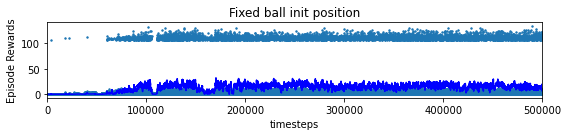

In [3]:
results_plotter.plot_results([monitor_log_path], int(1e6), results_plotter.X_TIMESTEPS, "Fixed ball init position")
plt.show()